<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue

In [2]:
# Define grid size and heuristic values
grid_size = 10
heuristic_values = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        heuristic_values[i][j] = abs(i - (grid_size - 1)) + abs(j - (grid_size - 1))

In [3]:
# Define start and treasure positions
start = (0, 0)
treasure = (grid_size - 1, grid_size - 1)

# Visualization setup
colors = np.full((grid_size, grid_size), 'white', dtype=object)
colors[start] = 'green'
colors[treasure] = 'yellow'

In [4]:
# Define Best-First Search function
def best_first_search(start, treasure):
    explored = set()
    path = []

    # Priority queue stores (heuristic, position)
    pq = PriorityQueue()
    pq.put((heuristic_values[start], start))

    while not pq.empty():
        _, current = pq.get()

        if current in explored:
            continue

        explored.add(current)
        path.append(current)

        if current == treasure:
            return explored, path

        # Explore neighbors
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid_size and 0 <= ny < grid_size and (nx, ny) not in explored:
                pq.put((heuristic_values[nx, ny], (nx, ny)))

    return explored, path

In [5]:
# Run Best-First Search
explored, path = best_first_search(start, treasure)

# Mark explored and path cells
for cell in explored:
    if cell != start and cell != treasure:
        colors[cell] = 'cyan'

for cell in path:
    if cell != start and cell != treasure:
        colors[cell] = 'blue'


<ipython-input-6-e831da1c1aea>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.imshow(grid, cmap=plt.cm.get_cmap('tab20c', len(set(colors.flatten()))))


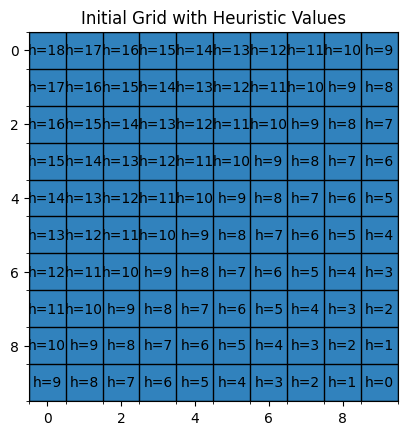

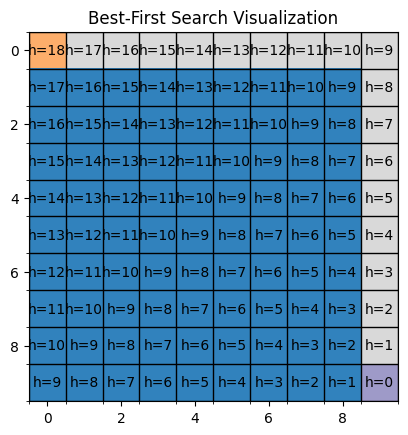

In [6]:
# Visualization function
def visualize(grid, title, heuristic_values):
    fig, ax = plt.subplots()
    ax.set_title(title)

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, f"h={int(heuristic_values[i][j])}", va='center', ha='center')

    ax.imshow(grid, cmap=plt.cm.get_cmap('tab20c', len(set(colors.flatten()))))
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_aspect('equal')
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    plt.show()

# Convert colors to a numerical format for visualization
color_map = {'white': 0, 'green': 1, 'yellow': 2, 'cyan': 3, 'blue': 4}
grid_visual = np.vectorize(color_map.get)(colors)

# Show initial grid with heuristic values
visualize(np.zeros((grid_size, grid_size)), "Initial Grid with Heuristic Values", heuristic_values)

# Show Best-First Search visualization
visualize(grid_visual, "Best-First Search Visualization", heuristic_values)